In [1]:
import numpy as np
from csbdeep.utils import normalize
from skimage.measure import compare_mse, compare_psnr, compare_ssim
from tifffile import imread, imsave
import matplotlib.pyplot as plt


In [4]:
def norm_minmse(x,gt):
    """Affine rescaling of x and gt such that their MSE is minimal."""
    x = x.astype(np.float32,copy=False)
    gt = normalize(gt,0.1,99.9,clip=False)
    x  = x - x.mean()
    gt = gt - gt.mean()
    scale = np.cov(x.flatten(),gt.flatten())[0,1] / np.var(x.flatten())
    return scale*x, gt

In [11]:
# gt: your grouth truth / reference image
gt_file = '/Users/prakash/Desktop/CARE/SNR2_I0_V1yo_ch00_GT_32.tif'
gt = imread(gt_file)
# x: your restored image
x_file = '/Users/prakash/Desktop/CARE/SNR2_I0_V1yo_ch00_Model10.tif'
x  = imread(x_file)

input_file = '/Users/prakash/Desktop/CARE/SNR2_I0_V1yo_ch00_Input32.tif'
inp  = imread(input_file)
# high MSE value since x is linearly rescaled compare to gt
#print(compare_psnr(x,gt,data_range=1))

# MSE value approx 0 since x and gt have been rescaled to have minimum MSE

In [3]:
print(compare_psnr(*norm_minmse(x,gt),data_range=1))
print(compare_psnr(*norm_minmse(inp,gt),data_range=1))


36.80743595175196
26.828910904034107


In [13]:
print(compare_mse(*norm_minmse(x,gt)))
print(compare_mse(*norm_minmse(inp,gt)))

0.0002085721917218093
0.002075433916263988


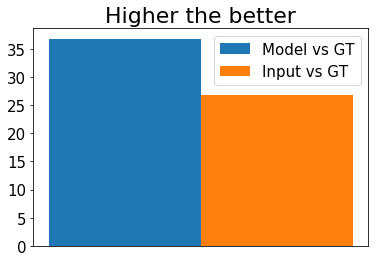

In [63]:
X = np.array([1])
Y1 = [36.80743595175196]
Z1 = [26.828910904034107]
plt.bar(X - 0.4, Y1) # offset of -0.4
plt.bar(X + 0.4, Z1) # offset of  0.4
plt.xticks([])
#plt.ylabel("PSNR", fontsize = 22)
plt.yticks(fontsize = 15)
plt.title("Higher the better", fontsize = 22)
plt.legend(["Model vs GT", "Input vs GT"], prop={'size': 15})
plt.savefig('/Users/prakash/Desktop/CARE/Denoise_PSNR.png')
plt.show()

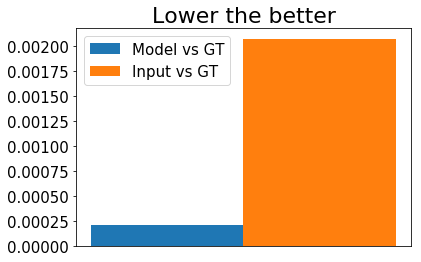

In [64]:
X = np.array([1])
Y1 = [0.0002085721917218093]
Z1 = [0.002075433916263988]
plt.bar(X - 0.4, Y1) # offset of -0.4
plt.bar(X + 0.4, Z1) # offset of  0.4
plt.xticks([])
plt.yticks(fontsize = 15)
#plt.ylabel("MSE", fontsize = 22)
plt.title("Lower the better", fontsize = 22)
plt.legend(["Model vs GT", "Input vs GT"], prop={'size': 15})
plt.savefig('/Users/prakash/Desktop/CARE/Denoise_MSE.png')
plt.show()

In [7]:
# gt: your grouth truth / reference image
gt_file = '/Users/prakash/Desktop/CARE/SNR2_I0_V1yo_ch00_GT_32.tif'
gt = imread(gt_file)
# x: your restored image
x_file = '/Users/prakash/Desktop/CARE/SNR2_I0_V1yo_ch00_UpscaledDenoised-1.tif'
x  = imread(x_file)

input_file = '/Users/prakash/Desktop/CARE/SNR2_I0_V1yo_ch00_InputDownsampled.tif'
inp  = imread(input_file)
# high MSE value since x is linearly rescaled compare to gt
#print(compare_psnr(x,gt,data_range=1))

# MSE value approx 0 since x and gt have been rescaled to have minimum MSE
print(compare_psnr(*norm_minmse(x,gt),data_range=1))
print(compare_psnr(*norm_minmse(inp,gt),data_range=1))



32.58455240440333
20.575276557867493


In [9]:
print(compare_mse(*norm_minmse(x,gt)))
print(compare_mse(*norm_minmse(inp,gt)))

0.0005514990384299672
0.008759359364298051


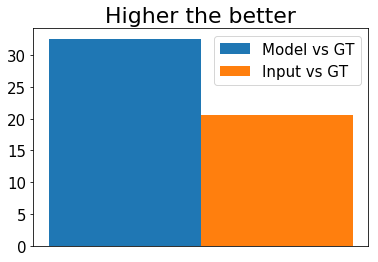

In [65]:
X = np.array([1])
Y1 = [32.58455240440333]
Z1 = [20.575276557867493]
plt.bar(X - 0.4, Y1) # offset of -0.4
plt.bar(X + 0.4, Z1) # offset of  0.4
plt.xticks([])
plt.yticks(fontsize = 15)
#plt.ylabel("PSNR", fontsize = 22)
plt.title("Higher the better", fontsize = 22)
plt.legend(["Model vs GT", "Input vs GT"], prop={'size': 15})
plt.savefig('/Users/prakash/Desktop/CARE/Anisotropic_PSNR.png')
plt.show()

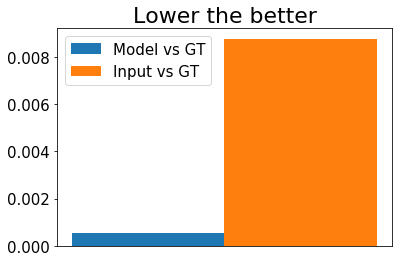

In [67]:
X = np.array([1])
Y1 = [0.0005514990384299672]
Z1 = [0.008759359364298051]
plt.bar(X - 0.4, Y1) # offset of -0.4
plt.bar(X + 0.4, Z1) # offset of  0.4
plt.xticks([])
plt.yticks(fontsize = 15)
#plt.ylabel("MSE", fontsize = 22)
plt.title("Lower the better", fontsize = 22)
plt.legend(["Model vs GT", "Input vs GT"], prop={'size': 15})
plt.savefig('/Users/prakash/Desktop/CARE/Anisotropic_MSE.png')
plt.show()

In [6]:
def noisy(image):
    row,col= image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    return noisy

(773, 739)


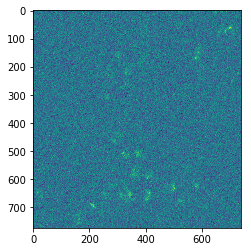

In [7]:
gt_file = '/Users/prakash/Desktop/4.tif'
gt = imread(gt_file)
noisy_image = noisy(gt)
print(noisy_image.shape)
plt.imshow(noisy_image)
plt.show()

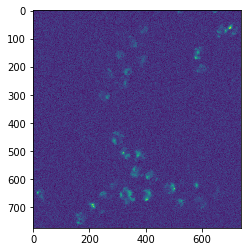

In [8]:
plt.imshow(gt)